# The Sparks Foundation
#GRIPMARCH2023

Submitted by:- SAHIL GHANWAT

**Role:- Data Science & Business Analytics task.**

**Task 2 - Prediction using Unsupervised ML**

Task: from given 'iris' dataset, predict the optimum number of clusters and represent it visually.

K-means is a centroid-based algorithm or a distance-based algorithm, where we calculate the distance to assign a point to a cluster in K-means

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets.

first we will import the libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree


In [8]:
# now loading the iris dataset

df = datasets.load_iris()
df = pd.DataFrame(df.data, columns= df.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# To find no. of rows and columns
df.shape

(150, 4)

In [10]:
# to find if any null value is present
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

**Now finding the optimal number of clusters for K-Means and determining the value of K.**

In [11]:
# now we will find optimum number of clusters for k-means classification
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

**Plotting the graph onto a line graph to observe the pattern**

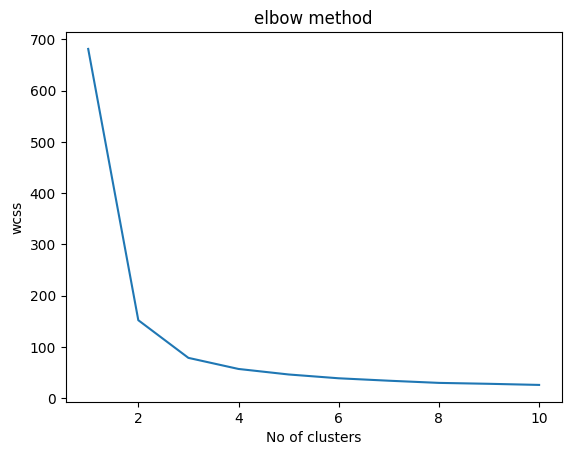

In [12]:
# Now Plotting elbow curve to find the no. of cluster
# plotting the results onto a line graph
plt.plot(range(1,11), wcss)
plt.title('elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss') # within cluster sum of squares
plt.show()

from the above elbow curve we can say that '3' is the optimal number of cluster

**Creating K-Means Classifier**

In [13]:
# Applying K-Meansto the dataset
# Creating the K-Means classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

**visualizing the cluster data**

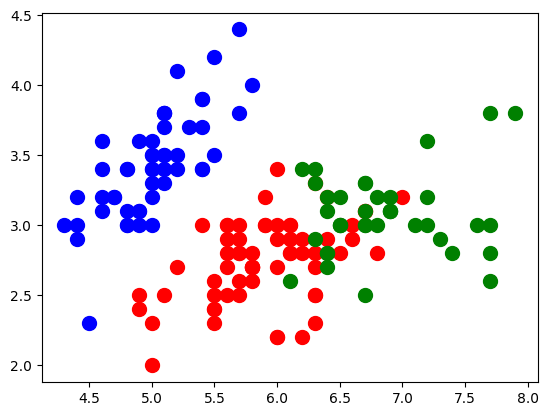

In [14]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'green', label = 'Iris-virginica')

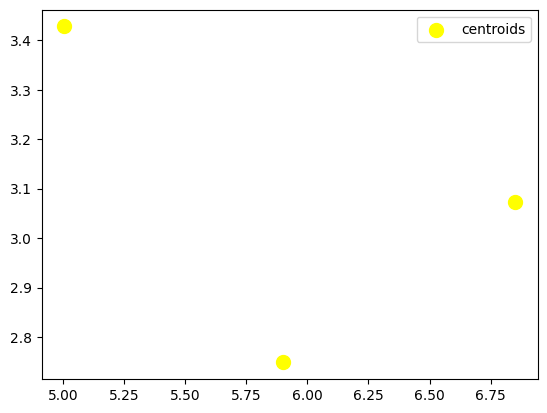

In [16]:
# now, plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label ='centroids')
plt.legend()

**Now combining both the abve graphs together and visualizing the cluster**

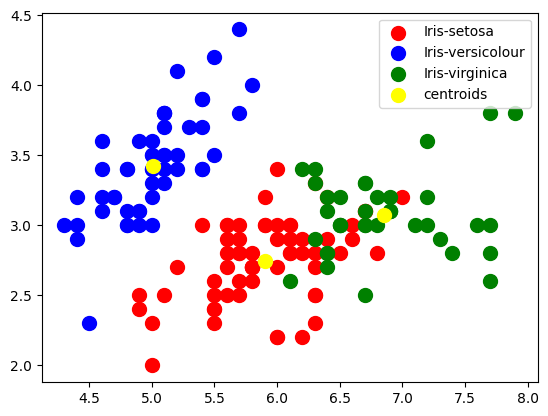

In [17]:
# Visualizing the clusters
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'green', label = 'Iris-virginica')

#now plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label ='centroids')
plt.legend()

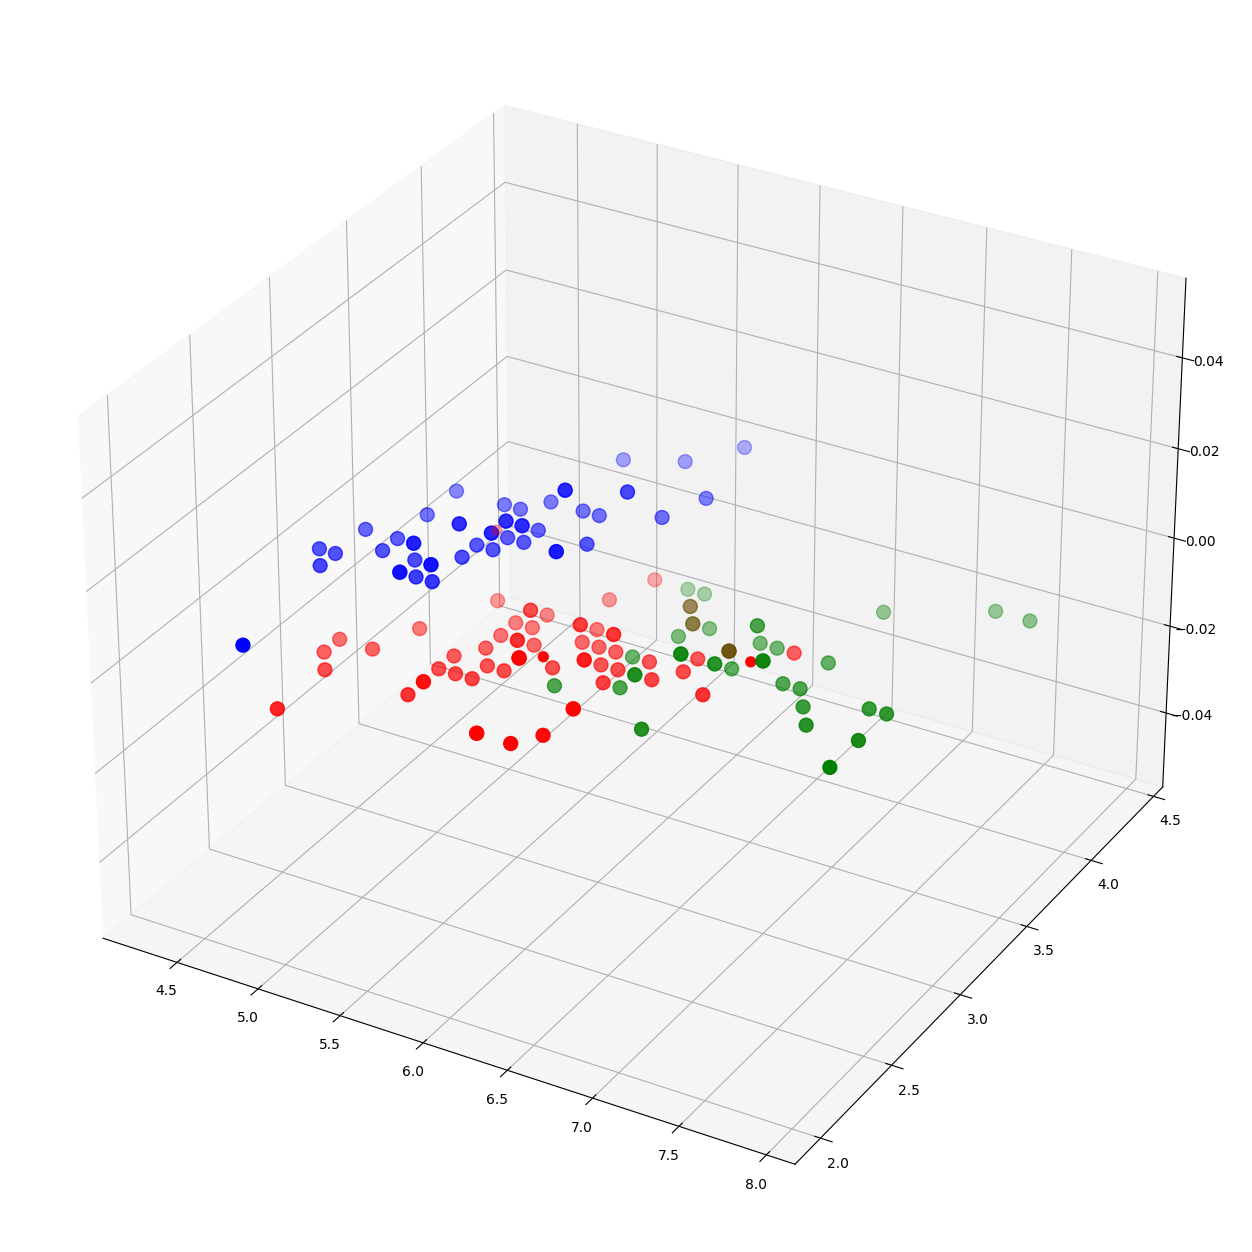

In [20]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize =(16,16))
ax = fig.add_subplot(111, projection = '3d')
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'green', label = 'Iris-virginica')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_ [:, 0], kmeans.cluster_centers_[:,1], s = 50, c='red', label = 'Centroids')
plt.show()

**Adding the predicts to the dataset**


In [29]:
data_with_clusters = df.copy()
data_with_clusters ["Clusters"] = y_kmeans
print(data_with_clusters.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

           Clusters  
0  Iris-versicolour  
1  Iris-versicolour  
2  Iris-versicolour  
3  Iris-versicolour  
4  Iris-versicolour  


**Conclusion**

1. In this task we have used K-Means Clustering Algorithm for clustering the different species of iris flower.
2. Using "Elbow method" we can find the total number of clusters that can be formed. Therefore we got total number of clusters as 3 and we already know that there are total 3 different species.
3. Using scatterplot and K-Means we can visualize different clusters that are formed. 